### Import Libraries

In [21]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
#import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf

In [63]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [94]:
start_date = dt.datetime(2016,1,1)
end_date = dt.datetime.now()

### Reading from yahoo finance (workaround)

In [95]:
yf.pdr_override()
data = pdr.get_data_yahoo("BTC-USD", start="2016-01-01")

[*********************100%***********************]  1 of 1 completed


### Check DF

In [96]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [97]:
### Summary stats of DF + Data types

In [98]:
data.isnull().values.any()

False

In [99]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2.575000e+03
mean,15193.828521,15576.308711,14767.321638,15199.870094,15199.870094,1.935158e+10
std,16556.830558,16981.069104,16064.263879,16550.800715,16550.800715,2.030047e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,3679.785278,3814.025024,3639.030396,3685.102783,3685.102783,2.318860e+09
50%,8705.190430,8879.620117,8473.973633,8716.790039,8716.790039,1.586600e+10
75%,19978.541016,20352.937500,19608.799805,19986.871094,19986.871094,3.095508e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [100]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Reindexing 
Date to feature, from index and adding typical incremental index 

In [101]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


### Check whether Volume correlates with close price
If it does, keep, otherwise, drop

In [102]:
(data['Close'].corr(data['Volume']))

0.6773211170589284

### Drop cols

In [103]:
data.drop(columns=['Adj Close'], inplace=True)
display(data)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600
...,...,...,...,...,...
2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639
2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543
2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050


### Training pipeline

1. Normalizing the values
2. K-fold cross validation for algo selection
3. Hyper param tuning (random + coarse)
4. Final evaluation

In [104]:
# We will use this as "unseen data" in inference on hugging face
latest_prices = data.tail(5)
print(latest_prices)

                                   Open          High           Low  \
Date                                                                  
2023-01-14 00:00:00+00:00  19910.537109  21075.142578  19907.828125   
2023-01-15 00:00:00+00:00  20977.484375  20993.748047  20606.986328   
2023-01-16 00:00:00+00:00  20882.224609  21360.875000  20715.746094   
2023-01-17 00:00:00+00:00  21175.833984  21438.660156  20978.533203   
2023-01-18 00:00:00+00:00  21179.898438  21542.103516  20555.054688   

                                  Close       Volume  
Date                                                  
2023-01-14 00:00:00+00:00  20976.298828  38967784639  
2023-01-15 00:00:00+00:00  20880.798828  19298407543  
2023-01-16 00:00:00+00:00  21169.632812  26792494050  
2023-01-17 00:00:00+00:00  21161.519531  24999983362  
2023-01-18 00:00:00+00:00  20749.441406  29787035648  


In [105]:
# Creating time series features
def create_features(df, label=None):
    df = df.copy()
    df['Dayofyear'] = df.index.dayofyear
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    
    return df

In [106]:
data = create_features(data)
display(data)

,Open,High,Low,Close,Volume,Dayofyear,Month,Year
Date,,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,1,1,2016
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,2,1,2016
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,3,1,2016
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,4,1,2016
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,5,1,2016
...,...,...,...,...,...,...,...,...
2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,14,1,2023
2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,15,1,2023
2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,16,1,2023


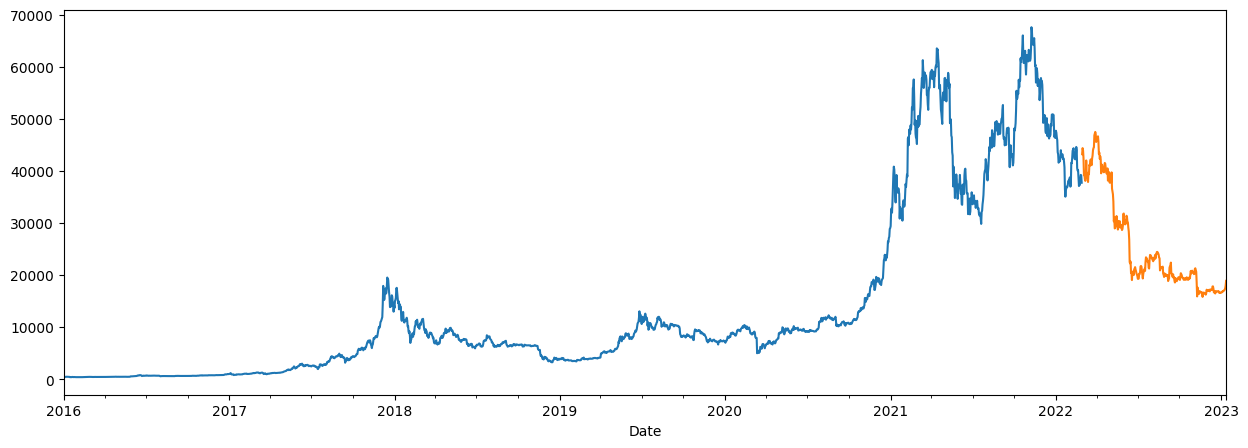

In [107]:
# Split train and test and plot

data = data.iloc[0:2569]


train = data.iloc[0:2250]
test = data.iloc[2250:len(data)]

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,5))
train['Close'].plot(ax=ax, label='Training Set')
test['Close'].plot(ax=ax, label='Test Set')
plt.show()

In [108]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#train['Volume'] = scaler.fit_transform(train['Volume'])

train.head()
test.head()

,Open,High,Low,Close,Volume,Dayofyear,Month,Year
Date,,,,,,,,
2022-02-28 00:00:00+00:00,37706.000000,43760.457031,37518.214844,43193.234375,35690014104,59,2,2022
2022-03-01 00:00:00+00:00,43194.503906,44793.601562,42952.585938,44354.636719,32479047645,60,3,2022
2022-03-02 00:00:00+00:00,44357.617188,45077.578125,43432.851562,43924.117188,29183112630,61,3,2022
2022-03-03 00:00:00+00:00,43925.195312,44021.578125,41914.750000,42451.789062,24967782593,62,3,2022
2022-03-04 00:00:00+00:00,42458.140625,42479.613281,38805.847656,39137.605469,28516271427,63,3,2022


In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = ['Open', 'High', 'Low', 'Volume', 'Dayofyear', 'Month', 'Year']
TARGET = ['Close']

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


reg = xgb.XGBRegressor(n_estimators=1000, early_stopping=15, learning_rate=0.001)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[21:52:43] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:21718.07227	validation_1-rmse:27057.64844
[1]	validation_0-rmse:21696.62500	validation_1-rmse:27030.96680
[2]	validation_0-rmse:21675.20117	validation_1-rmse:27004.31836
[3]	validation_0-rmse:21653.79688	validation_1-rmse:26977.69531
[4]	validation_0-rmse:21632.41211	validation_1-rmse:26951.09375
[5]	validation_0-rmse:21611.04688	validation_1-rmse:26924.51953
[6]	validation_0-rmse:21589.71289	validation_1-rmse:26897.99219
[7]	validation_0-rmse:21568.39844	validation_1-rmse:26871.47266
[8]	validation_

/opt/anaconda3/envs/lab1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22]	validation_0-rmse:21251.13477	validation_1-rmse:26476.09766
[23]	validation_0-rmse:21230.15430	validation_1-rmse:26449.93945
[24]	validation_0-rmse:21209.19727	validation_1-rmse:26423.87891
[25]	validation_0-rmse:21188.25391	validation_1-rmse:26397.60742
[26]	validation_0-rmse:21167.33008	validation_1-rmse:26371.60352
[27]	validation_0-rmse:21146.43555	validation_1-rmse:26345.62109
[28]	validation_0-rmse:21125.55664	validation_1-rmse:26319.54883
[29]	validation_0-rmse:21104.69531	validation_1-rmse:26293.50195
[30]	validation_0-rmse:21083.86133	validation_1-rmse:26267.52148
[31]	validation_0-rmse:21063.03906	validation_1-rmse:26241.52344
[32]	validation_0-rmse:21042.25000	validation_1-rmse:26215.59961
[33]	validation_0-rmse:21021.47461	validation_1-rmse:26189.65234
[34]	validation_0-rmse:21000.71680	validation_1-rmse:26163.77734
[35]	validation_0-rmse:20979.97852	validation_1-rmse:26137.88477
[36]	validation_0-rmse:20959.27148	validation_1-rmse:26112.06055
[37]	validation_0-rmse:20

[148]	validation_0-rmse:18764.56836	validation_1-rmse:23374.01758
[149]	validation_0-rmse:18746.04688	validation_1-rmse:23351.19922
[150]	validation_0-rmse:18727.54492	validation_1-rmse:23327.95508
[151]	validation_0-rmse:18709.06055	validation_1-rmse:23305.26758
[152]	validation_0-rmse:18690.60352	validation_1-rmse:23282.07227
[153]	validation_0-rmse:18672.15625	validation_1-rmse:23259.33984
[154]	validation_0-rmse:18653.73047	validation_1-rmse:23235.95508
[155]	validation_0-rmse:18635.32031	validation_1-rmse:23213.19336
[156]	validation_0-rmse:18616.92969	validation_1-rmse:23189.94336
[157]	validation_0-rmse:18598.55469	validation_1-rmse:23167.22461
[158]	validation_0-rmse:18580.20312	validation_1-rmse:23144.21680
[159]	validation_0-rmse:18561.86914	validation_1-rmse:23121.79492
[160]	validation_0-rmse:18543.55273	validation_1-rmse:23098.63281
[161]	validation_0-rmse:18525.25195	validation_1-rmse:23076.00586
[162]	validation_0-rmse:18506.96875	validation_1-rmse:23053.33594
[163]	vali

[273]	validation_0-rmse:16586.52930	validation_1-rmse:20664.67383
[274]	validation_0-rmse:16570.17773	validation_1-rmse:20644.22266
[275]	validation_0-rmse:16553.83594	validation_1-rmse:20624.17578
[276]	validation_0-rmse:16537.51367	validation_1-rmse:20603.78711
[277]	validation_0-rmse:16521.20312	validation_1-rmse:20583.59961
[278]	validation_0-rmse:16504.91016	validation_1-rmse:20563.23242
[279]	validation_0-rmse:16488.63086	validation_1-rmse:20543.13867
[280]	validation_0-rmse:16472.38086	validation_1-rmse:20522.81055
[281]	validation_0-rmse:16456.13086	validation_1-rmse:20502.70508
[282]	validation_0-rmse:16439.90039	validation_1-rmse:20482.09570
[283]	validation_0-rmse:16423.68359	validation_1-rmse:20462.02930
[284]	validation_0-rmse:16407.49609	validation_1-rmse:20441.78125
[285]	validation_0-rmse:16391.30859	validation_1-rmse:20421.71875
[286]	validation_0-rmse:16375.15430	validation_1-rmse:20401.53125
[287]	validation_0-rmse:16359.00195	validation_1-rmse:20381.54492
[288]	vali

[398]	validation_0-rmse:14662.56738	validation_1-rmse:18258.39844
[399]	validation_0-rmse:14648.11914	validation_1-rmse:18239.76758
[400]	validation_0-rmse:14633.68262	validation_1-rmse:18222.06250
[401]	validation_0-rmse:14619.26562	validation_1-rmse:18203.99609
[402]	validation_0-rmse:14604.86133	validation_1-rmse:18185.37109
[403]	validation_0-rmse:14590.46582	validation_1-rmse:18167.56055
[404]	validation_0-rmse:14576.08301	validation_1-rmse:18149.51758
[405]	validation_0-rmse:14561.72070	validation_1-rmse:18131.57227
[406]	validation_0-rmse:14547.36816	validation_1-rmse:18113.81250
[407]	validation_0-rmse:14533.03516	validation_1-rmse:18095.85352
[408]	validation_0-rmse:14518.71094	validation_1-rmse:18078.13281
[409]	validation_0-rmse:14504.40625	validation_1-rmse:18059.49023
[410]	validation_0-rmse:14490.11035	validation_1-rmse:18041.58398
[411]	validation_0-rmse:14475.82910	validation_1-rmse:18023.80664
[412]	validation_0-rmse:14461.56348	validation_1-rmse:18005.98828
[413]	vali

[523]	validation_0-rmse:12962.83008	validation_1-rmse:16121.86035
[524]	validation_0-rmse:12950.06348	validation_1-rmse:16105.26269
[525]	validation_0-rmse:12937.30957	validation_1-rmse:16088.93555
[526]	validation_0-rmse:12924.56055	validation_1-rmse:16073.25879
[527]	validation_0-rmse:12911.83496	validation_1-rmse:16057.12109
[528]	validation_0-rmse:12899.11914	validation_1-rmse:16041.21191
[529]	validation_0-rmse:12886.41406	validation_1-rmse:16024.57324
[530]	validation_0-rmse:12873.71875	validation_1-rmse:16009.12012
[531]	validation_0-rmse:12861.04492	validation_1-rmse:15993.20215
[532]	validation_0-rmse:12848.37109	validation_1-rmse:15977.04590
[533]	validation_0-rmse:12835.71973	validation_1-rmse:15961.19238
[534]	validation_0-rmse:12823.07715	validation_1-rmse:15945.88867
[535]	validation_0-rmse:12810.44824	validation_1-rmse:15929.94824
[536]	validation_0-rmse:12797.83301	validation_1-rmse:15913.42383
[537]	validation_0-rmse:12785.22656	validation_1-rmse:15897.67188
[538]	vali

[648]	validation_0-rmse:11460.65039	validation_1-rmse:14232.05566
[649]	validation_0-rmse:11449.36231	validation_1-rmse:14218.23242
[650]	validation_0-rmse:11438.08984	validation_1-rmse:14204.35938
[651]	validation_0-rmse:11426.82422	validation_1-rmse:14190.56348
[652]	validation_0-rmse:11415.57031	validation_1-rmse:14176.78027
[653]	validation_0-rmse:11404.33008	validation_1-rmse:14163.01172
[654]	validation_0-rmse:11393.09961	validation_1-rmse:14149.09863
[655]	validation_0-rmse:11381.88086	validation_1-rmse:14135.35644
[656]	validation_0-rmse:11370.67383	validation_1-rmse:14121.62988
[657]	validation_0-rmse:11359.47754	validation_1-rmse:14107.91406
[658]	validation_0-rmse:11348.29102	validation_1-rmse:14094.15430
[659]	validation_0-rmse:11337.11719	validation_1-rmse:14080.46680
[660]	validation_0-rmse:11325.95606	validation_1-rmse:14066.79394
[661]	validation_0-rmse:11314.80176	validation_1-rmse:14053.07324
[662]	validation_0-rmse:11303.66113	validation_1-rmse:14039.42871
[663]	vali

[773]	validation_0-rmse:10133.39160	validation_1-rmse:12585.97461
[774]	validation_0-rmse:10123.42578	validation_1-rmse:12573.56934
[775]	validation_0-rmse:10113.46387	validation_1-rmse:12561.33203
[776]	validation_0-rmse:10103.51074	validation_1-rmse:12549.10547
[777]	validation_0-rmse:10093.57227	validation_1-rmse:12536.89746
[778]	validation_0-rmse:10083.64160	validation_1-rmse:12524.71875
[779]	validation_0-rmse:10073.72168	validation_1-rmse:12512.27637
[780]	validation_0-rmse:10063.81055	validation_1-rmse:12500.10352
[781]	validation_0-rmse:10053.91113	validation_1-rmse:12487.94141
[782]	validation_0-rmse:10044.01856	validation_1-rmse:12475.63477
[783]	validation_0-rmse:10034.14258	validation_1-rmse:12463.05762
[784]	validation_0-rmse:10024.26660	validation_1-rmse:12450.92383
[785]	validation_0-rmse:10014.40527	validation_1-rmse:12438.80859
[786]	validation_0-rmse:10004.54981	validation_1-rmse:12426.63672
[787]	validation_0-rmse:9994.70996	validation_1-rmse:12414.51172
[788]	valid

[899]	validation_0-rmse:8951.82519	validation_1-rmse:11118.68555
[900]	validation_0-rmse:8943.02148	validation_1-rmse:11107.51465
[901]	validation_0-rmse:8934.23047	validation_1-rmse:11096.60547
[902]	validation_0-rmse:8925.44727	validation_1-rmse:11085.77539
[903]	validation_0-rmse:8916.67676	validation_1-rmse:11074.76856
[904]	validation_0-rmse:8907.90820	validation_1-rmse:11063.92969
[905]	validation_0-rmse:8899.15039	validation_1-rmse:11052.87109
[906]	validation_0-rmse:8890.40332	validation_1-rmse:11042.01856
[907]	validation_0-rmse:8881.66406	validation_1-rmse:11030.92188
[908]	validation_0-rmse:8872.93359	validation_1-rmse:11020.32910
[909]	validation_0-rmse:8864.20898	validation_1-rmse:11009.37305
[910]	validation_0-rmse:8855.49902	validation_1-rmse:10998.28906
[911]	validation_0-rmse:8846.79199	validation_1-rmse:10987.48340
[912]	validation_0-rmse:8838.09570	validation_1-rmse:10976.72559
[913]	validation_0-rmse:8829.40723	validation_1-rmse:10965.82910
[914]	validation_0-rmse:8

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
feature_importance = pd.DataFrame(data=reg.feature_importances_, 
             index=reg.get_booster().feature_names,
             columns=['importance'])
            

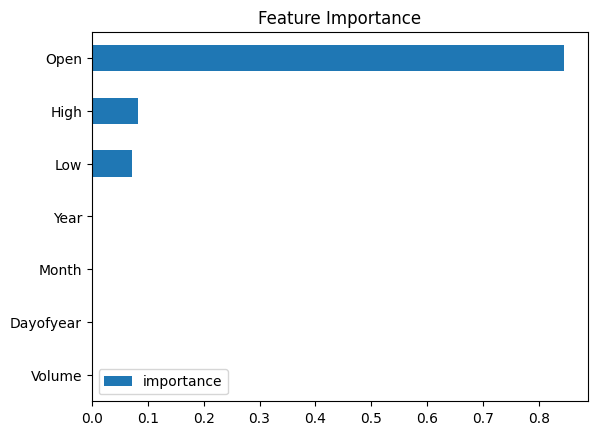

In [111]:
feature_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [112]:
test['Prediction'] = reg.predict(X_test)

/var/folders/7r/gsryxn2j2nzgfng_843c5krm0000gn/T/ipykernel_21400/3690085787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = reg.predict(X_test)


In [113]:
data = data.merge(test['Prediction'], how='left', left_index=True, right_index=True)

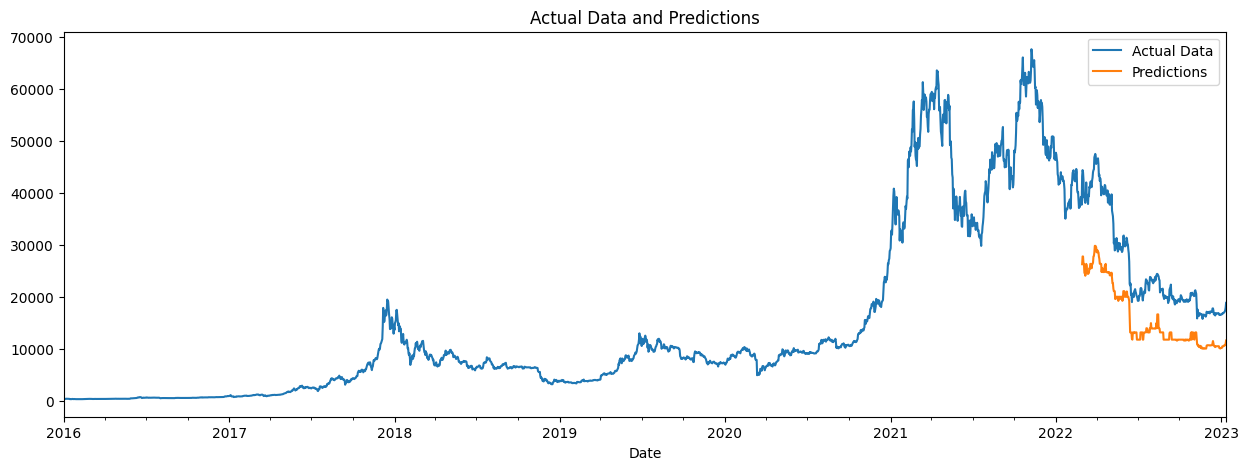

In [114]:
ax = data[['Close']].plot(figsize=(15,5))
data['Prediction'].plot(ax=ax)
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual Data and Predictions')
plt.show()

In [115]:
display(data)

,Open,High,Low,Close,Volume,Dayofyear,Month,Year,Prediction
Date,,,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,1,1,2016,NaN
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,2,1,2016,NaN
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,3,1,2016,NaN
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,4,1,2016,NaN
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,5,1,2016,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-08 00:00:00+00:00,16954.146484,17091.144531,16924.050781,17091.144531,9768827914,8,1,2023,10727.500000
2023-01-09 00:00:00+00:00,17093.992188,17389.957031,17093.992188,17196.554688,18624736866,9,1,2023,10727.500000
2023-01-10 00:00:00+00:00,17192.949219,17484.720703,17162.990234,17446.292969,15808338949,10,1,2023,10727.500000


In [467]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

estimator = xgb.XGBRegressor(early_stopping=15)

parameters = {
    'max_depth': [6, 8],
    'n_estimators': [1000, 2000, 3000],
    'learning_rate': [0.01, 0.005, 0.001],
}
tscv = TimeSeriesSplit(n_splits=3)
                     
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,
    cv = tscv,
    verbose=True,
)


grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/opt/anaconda3/envs/lab1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:05:31] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, early_stopping=15,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_s...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.005, 0.001],
                         'max_depth': [6, 8],
                         'n_estimators': [1000, 2000, 3000]},
             scoring='neg_mean_absolute_error', verbose=True)

In [468]:
grid_search.best_estimator_


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
# Retrained given best params on all data

reg = xgb.XGBRegressor(n_estimators=3000, early_stopping=15, learning_rate=0.01, max_depth=8)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[21:53:55] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:21524.86523	validation_1-rmse:26817.31445
[1]	validation_0-rmse:21312.31836	validation_1-rmse:26553.09180
[2]	validation_0-rmse:21101.89648	validation_1-rmse:26289.16016
[3]	validation_0-rmse:20893.55273	validation_1-rmse:26028.99219
[4]	validation_0-rmse:20687.27930	validation_1-rmse:25771.82812
[5]	validation_0-rmse:20483.06055	validation_1-rmse:25516.68750
[6]	validation_0-rmse:20280.86719	validation_1-rmse:25268.60938
[7]	validation_0-rmse:20080.66406	validation_1-rmse:25020.08008
[8]	validation_

/opt/anaconda3/envs/lab1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[26]	validation_0-rmse:16632.17383	validation_1-rmse:20724.20508
[27]	validation_0-rmse:16468.20117	validation_1-rmse:20519.11914
[28]	validation_0-rmse:16305.76660	validation_1-rmse:20319.90430
[29]	validation_0-rmse:16145.00781	validation_1-rmse:20115.91992
[30]	validation_0-rmse:15985.77637	validation_1-rmse:19918.91602
[31]	validation_0-rmse:15828.19434	validation_1-rmse:19721.55273
[32]	validation_0-rmse:15672.11621	validation_1-rmse:19527.96484
[33]	validation_0-rmse:15517.64453	validation_1-rmse:19332.94922
[34]	validation_0-rmse:15364.70996	validation_1-rmse:19135.78516
[35]	validation_0-rmse:15213.20312	validation_1-rmse:18948.39062
[36]	validation_0-rmse:15063.22559	validation_1-rmse:18760.26953
[37]	validation_0-rmse:14914.72754	validation_1-rmse:18575.76562
[38]	validation_0-rmse:14767.75098	validation_1-rmse:18391.64258
[39]	validation_0-rmse:14622.24121	validation_1-rmse:18209.81641
[40]	validation_0-rmse:14478.10742	validation_1-rmse:18031.52148
[41]	validation_0-rmse:14

[154]	validation_0-rmse:4699.46728	validation_1-rmse:5730.51416
[155]	validation_0-rmse:4653.58740	validation_1-rmse:5671.95898
[156]	validation_0-rmse:4608.13525	validation_1-rmse:5614.92432
[157]	validation_0-rmse:4563.13379	validation_1-rmse:5559.80176
[158]	validation_0-rmse:4518.57324	validation_1-rmse:5503.76025
[159]	validation_0-rmse:4474.47754	validation_1-rmse:5450.00439
[160]	validation_0-rmse:4430.82617	validation_1-rmse:5394.75439
[161]	validation_0-rmse:4387.58350	validation_1-rmse:5340.47754
[162]	validation_0-rmse:4344.79492	validation_1-rmse:5286.61426
[163]	validation_0-rmse:4302.43018	validation_1-rmse:5230.77246
[164]	validation_0-rmse:4260.46680	validation_1-rmse:5179.38818
[165]	validation_0-rmse:4218.92139	validation_1-rmse:5128.33301
[166]	validation_0-rmse:4177.81103	validation_1-rmse:5077.16357
[167]	validation_0-rmse:4137.11182	validation_1-rmse:5026.91406
[168]	validation_0-rmse:4096.79297	validation_1-rmse:4975.50732
[169]	validation_0-rmse:4056.89697	valid

[282]	validation_0-rmse:1375.73450	validation_1-rmse:1655.92822
[283]	validation_0-rmse:1363.19141	validation_1-rmse:1641.92725
[284]	validation_0-rmse:1350.73291	validation_1-rmse:1628.05347
[285]	validation_0-rmse:1338.41260	validation_1-rmse:1614.24329
[286]	validation_0-rmse:1326.25745	validation_1-rmse:1601.18274
[287]	validation_0-rmse:1314.17920	validation_1-rmse:1587.69019
[288]	validation_0-rmse:1302.21863	validation_1-rmse:1574.64014
[289]	validation_0-rmse:1290.40051	validation_1-rmse:1561.60193
[290]	validation_0-rmse:1278.73645	validation_1-rmse:1549.06934
[291]	validation_0-rmse:1267.15466	validation_1-rmse:1536.43848
[292]	validation_0-rmse:1255.72961	validation_1-rmse:1524.33740
[293]	validation_0-rmse:1244.43481	validation_1-rmse:1512.32581
[294]	validation_0-rmse:1233.25378	validation_1-rmse:1500.48413
[295]	validation_0-rmse:1222.15234	validation_1-rmse:1488.20874
[296]	validation_0-rmse:1211.15881	validation_1-rmse:1476.51709
[297]	validation_0-rmse:1200.27490	valid

[413]	validation_0-rmse:466.33615	validation_1-rmse:898.17047
[414]	validation_0-rmse:462.99274	validation_1-rmse:896.74847
[415]	validation_0-rmse:459.70953	validation_1-rmse:895.77313
[416]	validation_0-rmse:456.42950	validation_1-rmse:894.43933
[417]	validation_0-rmse:453.21298	validation_1-rmse:893.37164
[418]	validation_0-rmse:449.97082	validation_1-rmse:892.51764
[419]	validation_0-rmse:446.78943	validation_1-rmse:891.27985
[420]	validation_0-rmse:443.57214	validation_1-rmse:890.06494
[421]	validation_0-rmse:440.47076	validation_1-rmse:889.32233
[422]	validation_0-rmse:437.35523	validation_1-rmse:888.16803
[423]	validation_0-rmse:434.31821	validation_1-rmse:887.45514
[424]	validation_0-rmse:431.28451	validation_1-rmse:886.65063
[425]	validation_0-rmse:428.37164	validation_1-rmse:885.76123
[426]	validation_0-rmse:425.49887	validation_1-rmse:885.03949
[427]	validation_0-rmse:422.58246	validation_1-rmse:884.27136
[428]	validation_0-rmse:419.72125	validation_1-rmse:883.55219
[429]	va

[546]	validation_0-rmse:221.12015	validation_1-rmse:874.17542
[547]	validation_0-rmse:220.17424	validation_1-rmse:874.23529
[548]	validation_0-rmse:219.24141	validation_1-rmse:874.30279
[549]	validation_0-rmse:218.28863	validation_1-rmse:874.34656
[550]	validation_0-rmse:217.38637	validation_1-rmse:874.41498
[551]	validation_0-rmse:216.47681	validation_1-rmse:874.50977
[552]	validation_0-rmse:215.62671	validation_1-rmse:874.42902
[553]	validation_0-rmse:214.71211	validation_1-rmse:874.48987
[554]	validation_0-rmse:213.87849	validation_1-rmse:874.43970
[555]	validation_0-rmse:213.00179	validation_1-rmse:874.53748
[556]	validation_0-rmse:212.19453	validation_1-rmse:874.47253
[557]	validation_0-rmse:211.30637	validation_1-rmse:874.52264
[558]	validation_0-rmse:210.49631	validation_1-rmse:874.51111
[559]	validation_0-rmse:209.61972	validation_1-rmse:874.57416
[560]	validation_0-rmse:208.77681	validation_1-rmse:874.68408
[561]	validation_0-rmse:208.01765	validation_1-rmse:874.86005
[562]	va

[679]	validation_0-rmse:149.64325	validation_1-rmse:903.55957
[680]	validation_0-rmse:149.41695	validation_1-rmse:903.61865
[681]	validation_0-rmse:149.12863	validation_1-rmse:904.06921
[682]	validation_0-rmse:148.84290	validation_1-rmse:904.11920
[683]	validation_0-rmse:148.56195	validation_1-rmse:904.13214
[684]	validation_0-rmse:148.34731	validation_1-rmse:904.18176
[685]	validation_0-rmse:148.08449	validation_1-rmse:904.82831
[686]	validation_0-rmse:147.81076	validation_1-rmse:904.86456
[687]	validation_0-rmse:147.59567	validation_1-rmse:904.92059
[688]	validation_0-rmse:147.29395	validation_1-rmse:904.98602
[689]	validation_0-rmse:146.99558	validation_1-rmse:905.06500
[690]	validation_0-rmse:146.81235	validation_1-rmse:905.11993
[691]	validation_0-rmse:146.56317	validation_1-rmse:905.15393
[692]	validation_0-rmse:146.28363	validation_1-rmse:905.18256
[693]	validation_0-rmse:146.01259	validation_1-rmse:905.18860
[694]	validation_0-rmse:145.83862	validation_1-rmse:905.23389
[695]	va

[812]	validation_0-rmse:119.23360	validation_1-rmse:910.51947
[813]	validation_0-rmse:119.10517	validation_1-rmse:910.54492
[814]	validation_0-rmse:118.98625	validation_1-rmse:910.55878
[815]	validation_0-rmse:118.90440	validation_1-rmse:910.59631
[816]	validation_0-rmse:118.78335	validation_1-rmse:910.59992
[817]	validation_0-rmse:118.66619	validation_1-rmse:910.58264
[818]	validation_0-rmse:118.39100	validation_1-rmse:910.59674
[819]	validation_0-rmse:118.31802	validation_1-rmse:910.60107
[820]	validation_0-rmse:118.23782	validation_1-rmse:910.65894
[821]	validation_0-rmse:117.99121	validation_1-rmse:910.67700
[822]	validation_0-rmse:117.74693	validation_1-rmse:910.69745
[823]	validation_0-rmse:117.66927	validation_1-rmse:910.75427
[824]	validation_0-rmse:117.42841	validation_1-rmse:910.77277
[825]	validation_0-rmse:117.30538	validation_1-rmse:910.77600
[826]	validation_0-rmse:117.07814	validation_1-rmse:910.79584
[827]	validation_0-rmse:116.95727	validation_1-rmse:910.79919
[828]	va

[945]	validation_0-rmse:102.19260	validation_1-rmse:911.31909
[946]	validation_0-rmse:102.09217	validation_1-rmse:911.29541
[947]	validation_0-rmse:101.98225	validation_1-rmse:911.31281
[948]	validation_0-rmse:101.93165	validation_1-rmse:911.31842
[949]	validation_0-rmse:101.84216	validation_1-rmse:911.28760
[950]	validation_0-rmse:101.78339	validation_1-rmse:911.29279
[951]	validation_0-rmse:101.69395	validation_1-rmse:911.25671
[952]	validation_0-rmse:101.58607	validation_1-rmse:911.24347
[953]	validation_0-rmse:101.53446	validation_1-rmse:911.25836
[954]	validation_0-rmse:101.44653	validation_1-rmse:911.22803
[955]	validation_0-rmse:101.39714	validation_1-rmse:911.24048
[956]	validation_0-rmse:101.33956	validation_1-rmse:911.24573
[957]	validation_0-rmse:101.25261	validation_1-rmse:911.21582
[958]	validation_0-rmse:101.14630	validation_1-rmse:911.20386
[959]	validation_0-rmse:101.09454	validation_1-rmse:911.21808
[960]	validation_0-rmse:101.03799	validation_1-rmse:911.22284
[961]	va

[1078]	validation_0-rmse:90.48194	validation_1-rmse:911.75092
[1079]	validation_0-rmse:90.44485	validation_1-rmse:911.75269
[1080]	validation_0-rmse:90.31403	validation_1-rmse:911.75989
[1081]	validation_0-rmse:90.19837	validation_1-rmse:911.75311
[1082]	validation_0-rmse:90.11662	validation_1-rmse:911.73901
[1083]	validation_0-rmse:89.98558	validation_1-rmse:911.74622
[1084]	validation_0-rmse:89.95084	validation_1-rmse:911.74567
[1085]	validation_0-rmse:89.82594	validation_1-rmse:911.72308
[1086]	validation_0-rmse:89.69848	validation_1-rmse:911.73035
[1087]	validation_0-rmse:89.66409	validation_1-rmse:911.72980
[1088]	validation_0-rmse:89.62811	validation_1-rmse:911.73157
[1089]	validation_0-rmse:89.49939	validation_1-rmse:911.73877
[1090]	validation_0-rmse:89.37510	validation_1-rmse:911.74622
[1091]	validation_0-rmse:89.22041	validation_1-rmse:911.69153
[1092]	validation_0-rmse:89.18010	validation_1-rmse:911.69940
[1093]	validation_0-rmse:89.14471	validation_1-rmse:911.70172
[1094]	v

[1211]	validation_0-rmse:80.55148	validation_1-rmse:915.62628
[1212]	validation_0-rmse:80.46245	validation_1-rmse:915.63550
[1213]	validation_0-rmse:80.36820	validation_1-rmse:915.64459
[1214]	validation_0-rmse:80.26062	validation_1-rmse:916.06506
[1215]	validation_0-rmse:80.21720	validation_1-rmse:916.08051
[1216]	validation_0-rmse:80.19252	validation_1-rmse:916.08179
[1217]	validation_0-rmse:80.10372	validation_1-rmse:916.08728
[1218]	validation_0-rmse:79.99558	validation_1-rmse:916.11511
[1219]	validation_0-rmse:79.96631	validation_1-rmse:916.10797
[1220]	validation_0-rmse:79.87892	validation_1-rmse:916.11414
[1221]	validation_0-rmse:79.80822	validation_1-rmse:916.14185
[1222]	validation_0-rmse:79.78515	validation_1-rmse:916.14252
[1223]	validation_0-rmse:79.67947	validation_1-rmse:916.56152
[1224]	validation_0-rmse:79.65537	validation_1-rmse:916.56274
[1225]	validation_0-rmse:79.56523	validation_1-rmse:916.57172
[1226]	validation_0-rmse:79.46204	validation_1-rmse:916.59992
[1227]	v

[1344]	validation_0-rmse:73.41480	validation_1-rmse:917.96912
[1345]	validation_0-rmse:73.37190	validation_1-rmse:917.95044
[1346]	validation_0-rmse:73.32639	validation_1-rmse:917.95856
[1347]	validation_0-rmse:73.31123	validation_1-rmse:917.95972
[1348]	validation_0-rmse:73.24390	validation_1-rmse:917.98413
[1349]	validation_0-rmse:73.20207	validation_1-rmse:918.00452
[1350]	validation_0-rmse:73.18716	validation_1-rmse:918.00580
[1351]	validation_0-rmse:73.09276	validation_1-rmse:918.00336
[1352]	validation_0-rmse:73.03060	validation_1-rmse:918.02789
[1353]	validation_0-rmse:72.96733	validation_1-rmse:918.01172
[1354]	validation_0-rmse:72.94495	validation_1-rmse:918.01245
[1355]	validation_0-rmse:72.90088	validation_1-rmse:917.99310
[1356]	validation_0-rmse:72.83372	validation_1-rmse:918.00940
[1357]	validation_0-rmse:72.81926	validation_1-rmse:918.01074
[1358]	validation_0-rmse:72.76113	validation_1-rmse:918.02026
[1359]	validation_0-rmse:72.71770	validation_1-rmse:918.00110
[1360]	v

[1477]	validation_0-rmse:67.11179	validation_1-rmse:920.31995
[1478]	validation_0-rmse:67.05515	validation_1-rmse:920.30750
[1479]	validation_0-rmse:67.02733	validation_1-rmse:920.30688
[1480]	validation_0-rmse:66.94764	validation_1-rmse:920.31964
[1481]	validation_0-rmse:66.88872	validation_1-rmse:920.33154
[1482]	validation_0-rmse:66.86726	validation_1-rmse:920.33173
[1483]	validation_0-rmse:66.83958	validation_1-rmse:920.33118
[1484]	validation_0-rmse:66.79919	validation_1-rmse:920.34253
[1485]	validation_0-rmse:66.77216	validation_1-rmse:920.34192
[1486]	validation_0-rmse:66.73062	validation_1-rmse:920.35333
[1487]	validation_0-rmse:66.70945	validation_1-rmse:920.35199
[1488]	validation_0-rmse:66.65702	validation_1-rmse:920.56537
[1489]	validation_0-rmse:66.61303	validation_1-rmse:920.56927
[1490]	validation_0-rmse:66.49377	validation_1-rmse:920.56732
[1491]	validation_0-rmse:66.45509	validation_1-rmse:920.58661
[1492]	validation_0-rmse:66.41022	validation_1-rmse:920.58679
[1493]	v

[1610]	validation_0-rmse:60.32575	validation_1-rmse:921.64288
[1611]	validation_0-rmse:60.28229	validation_1-rmse:921.67084
[1612]	validation_0-rmse:60.18181	validation_1-rmse:921.67566
[1613]	validation_0-rmse:60.16139	validation_1-rmse:921.68146
[1614]	validation_0-rmse:60.13844	validation_1-rmse:921.68146
[1615]	validation_0-rmse:60.12222	validation_1-rmse:921.68848
[1616]	validation_0-rmse:60.10857	validation_1-rmse:921.68738
[1617]	validation_0-rmse:60.08617	validation_1-rmse:921.68738
[1618]	validation_0-rmse:60.07236	validation_1-rmse:921.68811
[1619]	validation_0-rmse:59.97497	validation_1-rmse:921.69373
[1620]	validation_0-rmse:59.96150	validation_1-rmse:921.69263
[1621]	validation_0-rmse:59.94157	validation_1-rmse:921.69830
[1622]	validation_0-rmse:59.91920	validation_1-rmse:921.69830
[1623]	validation_0-rmse:59.87635	validation_1-rmse:921.72626
[1624]	validation_0-rmse:59.77856	validation_1-rmse:921.71741
[1625]	validation_0-rmse:59.75887	validation_1-rmse:921.72315
[1626]	v

[1743]	validation_0-rmse:54.83012	validation_1-rmse:923.40192
[1744]	validation_0-rmse:54.80969	validation_1-rmse:923.40192
[1745]	validation_0-rmse:54.78556	validation_1-rmse:923.40198
[1746]	validation_0-rmse:54.76544	validation_1-rmse:923.40192
[1747]	validation_0-rmse:54.75222	validation_1-rmse:923.47205
[1748]	validation_0-rmse:54.72653	validation_1-rmse:923.45599
[1749]	validation_0-rmse:54.70686	validation_1-rmse:923.45599
[1750]	validation_0-rmse:54.67318	validation_1-rmse:923.45465
[1751]	validation_0-rmse:54.62786	validation_1-rmse:923.45532
[1752]	validation_0-rmse:54.58578	validation_1-rmse:923.45526
[1753]	validation_0-rmse:54.56052	validation_1-rmse:923.44550
[1754]	validation_0-rmse:54.51588	validation_1-rmse:923.45209
[1755]	validation_0-rmse:54.49650	validation_1-rmse:923.45209
[1756]	validation_0-rmse:54.41696	validation_1-rmse:923.47620
[1757]	validation_0-rmse:54.39199	validation_1-rmse:923.46039
[1758]	validation_0-rmse:54.37920	validation_1-rmse:923.53040
[1759]	v

[1876]	validation_0-rmse:49.72243	validation_1-rmse:927.82172
[1877]	validation_0-rmse:49.69163	validation_1-rmse:927.91003
[1878]	validation_0-rmse:49.65388	validation_1-rmse:927.91528
[1879]	validation_0-rmse:49.61534	validation_1-rmse:927.90894
[1880]	validation_0-rmse:49.60409	validation_1-rmse:927.90894
[1881]	validation_0-rmse:49.57371	validation_1-rmse:927.99683
[1882]	validation_0-rmse:49.54611	validation_1-rmse:927.99908
[1883]	validation_0-rmse:49.50882	validation_1-rmse:928.00421
[1884]	validation_0-rmse:49.46769	validation_1-rmse:928.00623
[1885]	validation_0-rmse:49.45025	validation_1-rmse:928.01257
[1886]	validation_0-rmse:49.43902	validation_1-rmse:928.01318
[1887]	validation_0-rmse:49.35762	validation_1-rmse:928.03027
[1888]	validation_0-rmse:49.34040	validation_1-rmse:928.03381
[1889]	validation_0-rmse:49.32938	validation_1-rmse:928.03381
[1890]	validation_0-rmse:49.25100	validation_1-rmse:928.05743
[1891]	validation_0-rmse:49.21310	validation_1-rmse:928.05261
[1892]	v

[2009]	validation_0-rmse:45.43723	validation_1-rmse:930.47150
[2010]	validation_0-rmse:45.41136	validation_1-rmse:930.47516
[2011]	validation_0-rmse:45.38582	validation_1-rmse:930.47980
[2012]	validation_0-rmse:45.37445	validation_1-rmse:930.47980
[2013]	validation_0-rmse:45.35097	validation_1-rmse:930.49085
[2014]	validation_0-rmse:45.33904	validation_1-rmse:930.49115
[2015]	validation_0-rmse:45.32804	validation_1-rmse:930.49194
[2016]	validation_0-rmse:45.30288	validation_1-rmse:930.49738
[2017]	validation_0-rmse:45.25430	validation_1-rmse:930.76074
[2018]	validation_0-rmse:45.22946	validation_1-rmse:930.76532
[2019]	validation_0-rmse:45.22043	validation_1-rmse:930.77057
[2020]	validation_0-rmse:45.19778	validation_1-rmse:930.78345
[2021]	validation_0-rmse:45.16687	validation_1-rmse:930.77716
[2022]	validation_0-rmse:45.12167	validation_1-rmse:931.04059
[2023]	validation_0-rmse:45.09723	validation_1-rmse:931.04620
[2024]	validation_0-rmse:45.08270	validation_1-rmse:931.04626
[2025]	v

[2141]	validation_0-rmse:42.25979	validation_1-rmse:934.32056
[2142]	validation_0-rmse:42.25259	validation_1-rmse:934.32404
[2143]	validation_0-rmse:42.24871	validation_1-rmse:934.32373
[2144]	validation_0-rmse:42.23331	validation_1-rmse:934.32489
[2145]	validation_0-rmse:42.19653	validation_1-rmse:934.32605
[2146]	validation_0-rmse:42.17310	validation_1-rmse:934.32105
[2147]	validation_0-rmse:42.16960	validation_1-rmse:934.32098
[2148]	validation_0-rmse:42.15916	validation_1-rmse:934.32513
[2149]	validation_0-rmse:42.13545	validation_1-rmse:934.31995
[2150]	validation_0-rmse:42.07828	validation_1-rmse:934.32922
[2151]	validation_0-rmse:42.06081	validation_1-rmse:934.33002
[2152]	validation_0-rmse:42.04492	validation_1-rmse:934.33875
[2153]	validation_0-rmse:42.02158	validation_1-rmse:934.33368
[2154]	validation_0-rmse:42.01813	validation_1-rmse:934.33368
[2155]	validation_0-rmse:42.00788	validation_1-rmse:934.33777
[2156]	validation_0-rmse:41.98489	validation_1-rmse:934.33270
[2157]	v

[2274]	validation_0-rmse:38.92236	validation_1-rmse:934.73810
[2275]	validation_0-rmse:38.88065	validation_1-rmse:934.68195
[2276]	validation_0-rmse:38.84734	validation_1-rmse:934.67822
[2277]	validation_0-rmse:38.82387	validation_1-rmse:934.67889
[2278]	validation_0-rmse:38.77379	validation_1-rmse:934.81329
[2279]	validation_0-rmse:38.74607	validation_1-rmse:934.80633
[2280]	validation_0-rmse:38.71674	validation_1-rmse:934.80450
[2281]	validation_0-rmse:38.70048	validation_1-rmse:934.79962
[2282]	validation_0-rmse:38.67886	validation_1-rmse:934.74225
[2283]	validation_0-rmse:38.65571	validation_1-rmse:934.74280
[2284]	validation_0-rmse:38.64251	validation_1-rmse:934.74524
[2285]	validation_0-rmse:38.61673	validation_1-rmse:934.79132
[2286]	validation_0-rmse:38.58007	validation_1-rmse:934.79040
[2287]	validation_0-rmse:38.56755	validation_1-rmse:934.78980
[2288]	validation_0-rmse:38.53121	validation_1-rmse:934.78888
[2289]	validation_0-rmse:38.52313	validation_1-rmse:934.79120
[2290]	v

[2407]	validation_0-rmse:36.02082	validation_1-rmse:935.03131
[2408]	validation_0-rmse:36.00887	validation_1-rmse:935.02991
[2409]	validation_0-rmse:36.00097	validation_1-rmse:935.03223
[2410]	validation_0-rmse:35.96572	validation_1-rmse:935.03168
[2411]	validation_0-rmse:35.94058	validation_1-rmse:935.02765
[2412]	validation_0-rmse:35.92878	validation_1-rmse:935.02875
[2413]	validation_0-rmse:35.92576	validation_1-rmse:935.02875
[2414]	validation_0-rmse:35.90097	validation_1-rmse:935.02460
[2415]	validation_0-rmse:35.88945	validation_1-rmse:935.02612
[2416]	validation_0-rmse:35.85756	validation_1-rmse:935.03497
[2417]	validation_0-rmse:35.84594	validation_1-rmse:935.03375
[2418]	validation_0-rmse:35.82017	validation_1-rmse:935.03754
[2419]	validation_0-rmse:35.80874	validation_1-rmse:935.03918
[2420]	validation_0-rmse:35.79726	validation_1-rmse:935.04028
[2421]	validation_0-rmse:35.75940	validation_1-rmse:935.17383
[2422]	validation_0-rmse:35.75156	validation_1-rmse:935.17725
[2423]	v

[2540]	validation_0-rmse:33.53665	validation_1-rmse:938.40802
[2541]	validation_0-rmse:33.51844	validation_1-rmse:938.36755
[2542]	validation_0-rmse:33.49495	validation_1-rmse:938.35480
[2543]	validation_0-rmse:33.47300	validation_1-rmse:938.36700
[2544]	validation_0-rmse:33.46349	validation_1-rmse:938.36700
[2545]	validation_0-rmse:33.44607	validation_1-rmse:938.32611
[2546]	validation_0-rmse:33.42659	validation_1-rmse:938.31940
[2547]	validation_0-rmse:33.40944	validation_1-rmse:938.28040
[2548]	validation_0-rmse:33.38607	validation_1-rmse:938.26776
[2549]	validation_0-rmse:33.36906	validation_1-rmse:938.22943
[2550]	validation_0-rmse:33.34184	validation_1-rmse:938.23877
[2551]	validation_0-rmse:33.33248	validation_1-rmse:938.23877
[2552]	validation_0-rmse:33.31437	validation_1-rmse:938.24652
[2553]	validation_0-rmse:33.30569	validation_1-rmse:938.24652
[2554]	validation_0-rmse:33.29653	validation_1-rmse:938.24652
[2555]	validation_0-rmse:33.27383	validation_1-rmse:938.23859
[2556]	v

[2673]	validation_0-rmse:31.46830	validation_1-rmse:938.71075
[2674]	validation_0-rmse:31.45306	validation_1-rmse:938.71771
[2675]	validation_0-rmse:31.43825	validation_1-rmse:938.68445
[2676]	validation_0-rmse:31.41605	validation_1-rmse:938.72424
[2677]	validation_0-rmse:31.40107	validation_1-rmse:938.73120
[2678]	validation_0-rmse:31.38042	validation_1-rmse:938.73846
[2679]	validation_0-rmse:31.36587	validation_1-rmse:938.74542
[2680]	validation_0-rmse:31.35306	validation_1-rmse:938.74451
[2681]	validation_0-rmse:31.33872	validation_1-rmse:938.74194
[2682]	validation_0-rmse:31.31701	validation_1-rmse:938.78021
[2683]	validation_0-rmse:31.28798	validation_1-rmse:938.78796
[2684]	validation_0-rmse:31.28007	validation_1-rmse:938.78742
[2685]	validation_0-rmse:31.26601	validation_1-rmse:938.79431
[2686]	validation_0-rmse:31.24471	validation_1-rmse:938.83191
[2687]	validation_0-rmse:31.23211	validation_1-rmse:938.83099
[2688]	validation_0-rmse:31.21108	validation_1-rmse:938.86877
[2689]	v

[2806]	validation_0-rmse:29.24319	validation_1-rmse:939.24750
[2807]	validation_0-rmse:29.22948	validation_1-rmse:939.24994
[2808]	validation_0-rmse:29.20707	validation_1-rmse:939.23889
[2809]	validation_0-rmse:29.19234	validation_1-rmse:939.23151
[2810]	validation_0-rmse:29.18500	validation_1-rmse:939.23352
[2811]	validation_0-rmse:29.17988	validation_1-rmse:939.23334
[2812]	validation_0-rmse:29.16151	validation_1-rmse:939.23401
[2813]	validation_0-rmse:29.15361	validation_1-rmse:939.23505
[2814]	validation_0-rmse:29.12452	validation_1-rmse:939.23431
[2815]	validation_0-rmse:29.12236	validation_1-rmse:939.23431
[2816]	validation_0-rmse:29.11131	validation_1-rmse:939.23370
[2817]	validation_0-rmse:29.08924	validation_1-rmse:939.22278
[2818]	validation_0-rmse:29.08419	validation_1-rmse:939.22259
[2819]	validation_0-rmse:29.07643	validation_1-rmse:939.22223
[2820]	validation_0-rmse:29.05466	validation_1-rmse:939.22156
[2821]	validation_0-rmse:29.03746	validation_1-rmse:939.22046
[2822]	v

[2939]	validation_0-rmse:27.40863	validation_1-rmse:939.01715
[2940]	validation_0-rmse:27.39307	validation_1-rmse:939.01715
[2941]	validation_0-rmse:27.37436	validation_1-rmse:939.01709
[2942]	validation_0-rmse:27.36824	validation_1-rmse:939.01715
[2943]	validation_0-rmse:27.35017	validation_1-rmse:939.01709
[2944]	validation_0-rmse:27.33643	validation_1-rmse:939.01776
[2945]	validation_0-rmse:27.33011	validation_1-rmse:939.01776
[2946]	validation_0-rmse:27.31199	validation_1-rmse:939.01953
[2947]	validation_0-rmse:27.30678	validation_1-rmse:939.01941
[2948]	validation_0-rmse:27.29648	validation_1-rmse:939.01947
[2949]	validation_0-rmse:27.29024	validation_1-rmse:939.01947
[2950]	validation_0-rmse:27.27049	validation_1-rmse:939.01062
[2951]	validation_0-rmse:27.25565	validation_1-rmse:939.01056
[2952]	validation_0-rmse:27.23320	validation_1-rmse:939.01221
[2953]	validation_0-rmse:27.21180	validation_1-rmse:939.01148
[2954]	validation_0-rmse:27.19363	validation_1-rmse:939.01221
[2955]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [117]:
# Despite best params, it overfit a little bit --> retrain

reg = xgb.XGBRegressor(n_estimators=1100, early_stopping=15, learning_rate=0.005, max_depth=8)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[21:54:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:21632.19922	validation_1-rmse:26950.83008
[1]	validation_0-rmse:21525.40039	validation_1-rmse:26817.97461
[2]	validation_0-rmse:21419.11914	validation_1-rmse:26685.85547
[3]	validation_0-rmse:21313.37109	validation_1-rmse:26554.00977
[4]	validation_0-rmse:21208.15820	validation_1-rmse:26422.41797
[5]	validation_0-rmse:21103.45312	validation_1-rmse:26291.86328
[6]	validation_0-rmse:20999.27539	validation_1-rmse:26161.77930
[7]	validation_0-rmse:20895.61328	validation_1-rmse:26032.90039
[8]	validation_

[118]	validation_0-rmse:12072.85254	validation_1-rmse:15001.46387
[119]	validation_0-rmse:12013.37891	validation_1-rmse:14928.35449
[120]	validation_0-rmse:11954.21289	validation_1-rmse:14854.54394
[121]	validation_0-rmse:11895.32910	validation_1-rmse:14780.76172
[122]	validation_0-rmse:11836.74121	validation_1-rmse:14708.72949
[123]	validation_0-rmse:11778.48242	validation_1-rmse:14633.04004
[124]	validation_0-rmse:11720.50684	validation_1-rmse:14558.91602
[125]	validation_0-rmse:11662.78320	validation_1-rmse:14487.95801
[126]	validation_0-rmse:11605.35449	validation_1-rmse:14416.08008
[127]	validation_0-rmse:11548.24805	validation_1-rmse:14341.96191
[128]	validation_0-rmse:11491.38574	validation_1-rmse:14270.73242
[129]	validation_0-rmse:11434.79883	validation_1-rmse:14201.14062
[130]	validation_0-rmse:11378.49609	validation_1-rmse:14132.17676
[131]	validation_0-rmse:11322.47852	validation_1-rmse:14063.55469
[132]	validation_0-rmse:11266.75195	validation_1-rmse:13994.84863
[133]	vali

[245]	validation_0-rmse:6457.43262	validation_1-rmse:7962.59033
[246]	validation_0-rmse:6425.77295	validation_1-rmse:7921.08252
[247]	validation_0-rmse:6394.26416	validation_1-rmse:7879.62061
[248]	validation_0-rmse:6362.91113	validation_1-rmse:7841.13965
[249]	validation_0-rmse:6331.71045	validation_1-rmse:7801.68506
[250]	validation_0-rmse:6300.67188	validation_1-rmse:7762.21582
[251]	validation_0-rmse:6269.78662	validation_1-rmse:7721.55469
[252]	validation_0-rmse:6239.05176	validation_1-rmse:7683.22363
[253]	validation_0-rmse:6208.46973	validation_1-rmse:7644.34912
[254]	validation_0-rmse:6178.04102	validation_1-rmse:7604.83154
[255]	validation_0-rmse:6147.76318	validation_1-rmse:7565.01904
[256]	validation_0-rmse:6117.63428	validation_1-rmse:7527.17285
[257]	validation_0-rmse:6087.65478	validation_1-rmse:7489.13477
[258]	validation_0-rmse:6057.82080	validation_1-rmse:7452.20654
[259]	validation_0-rmse:6028.14453	validation_1-rmse:7414.96191
[260]	validation_0-rmse:5998.60840	valid

[374]	validation_0-rmse:3434.94653	validation_1-rmse:4146.30908
[375]	validation_0-rmse:3418.28564	validation_1-rmse:4125.13477
[376]	validation_0-rmse:3401.71460	validation_1-rmse:4103.57178
[377]	validation_0-rmse:3385.20850	validation_1-rmse:4083.01807
[378]	validation_0-rmse:3368.78394	validation_1-rmse:4063.10791
[379]	validation_0-rmse:3352.45386	validation_1-rmse:4042.95239
[380]	validation_0-rmse:3336.21387	validation_1-rmse:4022.57349
[381]	validation_0-rmse:3320.03906	validation_1-rmse:4002.19653
[382]	validation_0-rmse:3303.95215	validation_1-rmse:3982.28906
[383]	validation_0-rmse:3287.93457	validation_1-rmse:3962.29712
[384]	validation_0-rmse:3272.00757	validation_1-rmse:3942.67798
[385]	validation_0-rmse:3256.16211	validation_1-rmse:3922.65454
[386]	validation_0-rmse:3240.38721	validation_1-rmse:3903.00439
[387]	validation_0-rmse:3224.69922	validation_1-rmse:3883.68042
[388]	validation_0-rmse:3209.09644	validation_1-rmse:3863.53296
[389]	validation_0-rmse:3193.55518	valid

[503]	validation_0-rmse:1848.09338	validation_1-rmse:2201.91772
[504]	validation_0-rmse:1839.37769	validation_1-rmse:2191.56445
[505]	validation_0-rmse:1830.72058	validation_1-rmse:2181.30200
[506]	validation_0-rmse:1822.10376	validation_1-rmse:2171.19336
[507]	validation_0-rmse:1813.54394	validation_1-rmse:2161.28711
[508]	validation_0-rmse:1805.00549	validation_1-rmse:2151.07935
[509]	validation_0-rmse:1796.52429	validation_1-rmse:2141.33228
[510]	validation_0-rmse:1788.09009	validation_1-rmse:2131.57251
[511]	validation_0-rmse:1779.69104	validation_1-rmse:2121.75269
[512]	validation_0-rmse:1771.34033	validation_1-rmse:2112.00342
[513]	validation_0-rmse:1763.03919	validation_1-rmse:2102.37500
[514]	validation_0-rmse:1754.75684	validation_1-rmse:2092.60571
[515]	validation_0-rmse:1746.53137	validation_1-rmse:2082.99683
[516]	validation_0-rmse:1738.35303	validation_1-rmse:2073.46265
[517]	validation_0-rmse:1730.21387	validation_1-rmse:2064.17017
[518]	validation_0-rmse:1722.12341	valid

[632]	validation_0-rmse:1025.31714	validation_1-rmse:1292.94824
[633]	validation_0-rmse:1020.83722	validation_1-rmse:1288.73999
[634]	validation_0-rmse:1016.38977	validation_1-rmse:1284.35962
[635]	validation_0-rmse:1011.98132	validation_1-rmse:1280.12500
[636]	validation_0-rmse:1007.57776	validation_1-rmse:1275.71387
[637]	validation_0-rmse:1003.20074	validation_1-rmse:1271.37610
[638]	validation_0-rmse:998.82770	validation_1-rmse:1267.16321
[639]	validation_0-rmse:994.49658	validation_1-rmse:1262.86291
[640]	validation_0-rmse:990.15973	validation_1-rmse:1258.89831
[641]	validation_0-rmse:985.88062	validation_1-rmse:1254.83154
[642]	validation_0-rmse:981.60523	validation_1-rmse:1250.72375
[643]	validation_0-rmse:977.35553	validation_1-rmse:1247.14453
[644]	validation_0-rmse:973.11230	validation_1-rmse:1243.28735
[645]	validation_0-rmse:968.92407	validation_1-rmse:1239.76599
[646]	validation_0-rmse:964.73724	validation_1-rmse:1235.75208
[647]	validation_0-rmse:960.57770	validation_1-rm

[763]	validation_0-rmse:597.86365	validation_1-rmse:962.66498
[764]	validation_0-rmse:595.55505	validation_1-rmse:961.72565
[765]	validation_0-rmse:593.22247	validation_1-rmse:960.44800
[766]	validation_0-rmse:590.93897	validation_1-rmse:959.08472
[767]	validation_0-rmse:588.66797	validation_1-rmse:958.18378
[768]	validation_0-rmse:586.38415	validation_1-rmse:956.94928
[769]	validation_0-rmse:584.12988	validation_1-rmse:955.62824
[770]	validation_0-rmse:581.87415	validation_1-rmse:954.69891
[771]	validation_0-rmse:579.67682	validation_1-rmse:953.78809
[772]	validation_0-rmse:577.44299	validation_1-rmse:952.56506
[773]	validation_0-rmse:575.26074	validation_1-rmse:951.47906
[774]	validation_0-rmse:573.06128	validation_1-rmse:950.13648
[775]	validation_0-rmse:570.91467	validation_1-rmse:949.25024
[776]	validation_0-rmse:568.72400	validation_1-rmse:948.07989
[777]	validation_0-rmse:566.59125	validation_1-rmse:947.01813
[778]	validation_0-rmse:564.42230	validation_1-rmse:945.87433
[779]	va

[896]	validation_0-rmse:374.42554	validation_1-rmse:877.18567
[897]	validation_0-rmse:373.23721	validation_1-rmse:876.90662
[898]	validation_0-rmse:372.05158	validation_1-rmse:876.69934
[899]	validation_0-rmse:370.87552	validation_1-rmse:876.59192
[900]	validation_0-rmse:369.70123	validation_1-rmse:876.39252
[901]	validation_0-rmse:368.54141	validation_1-rmse:876.25024
[902]	validation_0-rmse:367.37958	validation_1-rmse:875.99078
[903]	validation_0-rmse:366.22842	validation_1-rmse:875.89856
[904]	validation_0-rmse:365.07849	validation_1-rmse:875.71417
[905]	validation_0-rmse:363.93494	validation_1-rmse:875.52521
[906]	validation_0-rmse:362.79547	validation_1-rmse:875.28192
[907]	validation_0-rmse:361.69284	validation_1-rmse:875.20508
[908]	validation_0-rmse:360.60730	validation_1-rmse:875.05884
[909]	validation_0-rmse:359.51474	validation_1-rmse:874.88660
[910]	validation_0-rmse:358.39801	validation_1-rmse:874.65845
[911]	validation_0-rmse:357.28137	validation_1-rmse:874.49426
[912]	va

[1028]	validation_0-rmse:259.44299	validation_1-rmse:875.15912
[1029]	validation_0-rmse:258.82022	validation_1-rmse:875.07941
[1030]	validation_0-rmse:258.20132	validation_1-rmse:874.99988
[1031]	validation_0-rmse:257.57178	validation_1-rmse:875.08380
[1032]	validation_0-rmse:256.96085	validation_1-rmse:875.00879
[1033]	validation_0-rmse:256.32770	validation_1-rmse:875.05878
[1034]	validation_0-rmse:255.72156	validation_1-rmse:874.98505
[1035]	validation_0-rmse:255.10461	validation_1-rmse:875.03863
[1036]	validation_0-rmse:254.50581	validation_1-rmse:874.98621
[1037]	validation_0-rmse:253.88869	validation_1-rmse:875.04999
[1038]	validation_0-rmse:253.29515	validation_1-rmse:875.00006
[1039]	validation_0-rmse:252.69461	validation_1-rmse:875.06451
[1040]	validation_0-rmse:252.10820	validation_1-rmse:875.01709
[1041]	validation_0-rmse:251.49593	validation_1-rmse:875.07202
[1042]	validation_0-rmse:250.95357	validation_1-rmse:875.13831
[1043]	validation_0-rmse:250.37447	validation_1-rmse:87

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.005, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [118]:
test['Prediction_tune'] = reg.predict(X_test)

In [119]:
data = data.merge(test['Prediction_tune'], how='left', left_index=True, right_index=True)

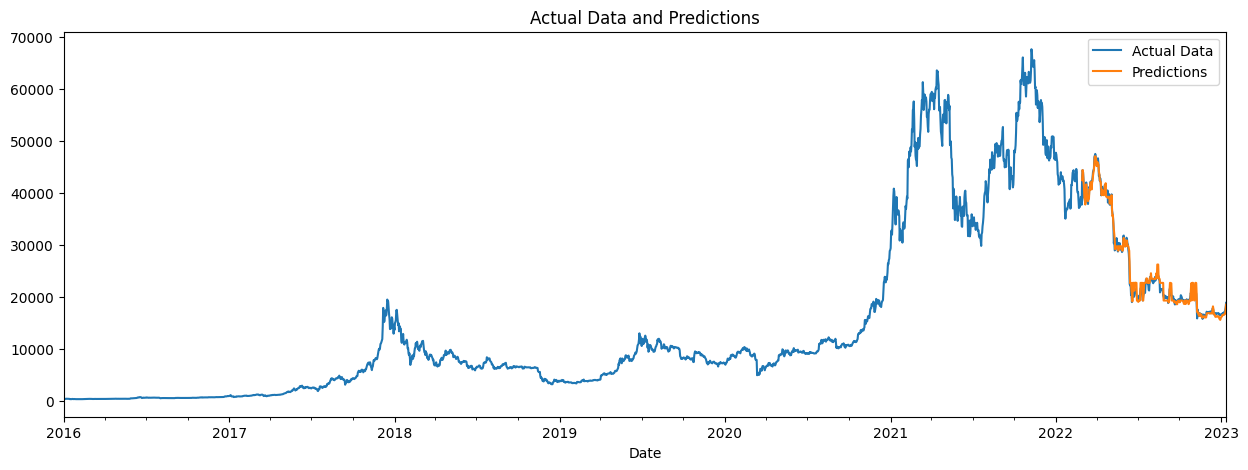

In [120]:
ax = data[['Close']].plot(figsize=(15,5))
data['Prediction_tune'].plot(ax=ax)
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual Data and Predictions')
plt.show()

In [122]:
# Check 5 latest rows (i.e. predictions)
data.tail(5)

,Open,High,Low,Close,Volume,Dayofyear,Month,Year,Prediction,Prediction_tune
Date,,,,,,,,,,
2023-01-08 00:00:00+00:00,16954.146484,17091.144531,16924.050781,17091.144531,9768827914,8,1,2023,10727.500000,16677.853516
2023-01-09 00:00:00+00:00,17093.992188,17389.957031,17093.992188,17196.554688,18624736866,9,1,2023,10727.500000,16760.757812
2023-01-10 00:00:00+00:00,17192.949219,17484.720703,17162.990234,17446.292969,15808338949,10,1,2023,10727.500000,16762.568359
2023-01-11 00:00:00+00:00,17446.359375,17934.896484,17337.994141,17934.896484,18372283782,11,1,2023,11086.961914,17615.267578
2023-01-12 00:00:00+00:00,18117.593750,19030.087891,17995.203125,18869.587891,34971338710,12,1,2023,11629.323242,18529.984375


In [123]:
# Train on all data

y_train_all = data['Close']
data.drop(columns=['Close', 'Prediction', 'Prediction_tune'], inplace=True)
X_train_all = data
reg = xgb.XGBRegressor(n_estimators=1100, early_stopping=15, learning_rate=0.005, max_depth=8)
reg.fit(X_train_all, y_train_all)

/opt/anaconda3/envs/lab1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:54:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.005, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [124]:
# predict on completely unseen data

latest_prices = create_features(latest_prices)

prices = latest_prices['Close']
latest_prices.drop(columns=['Close'], inplace=True)

latest_prices = reg.predict(latest_prices)


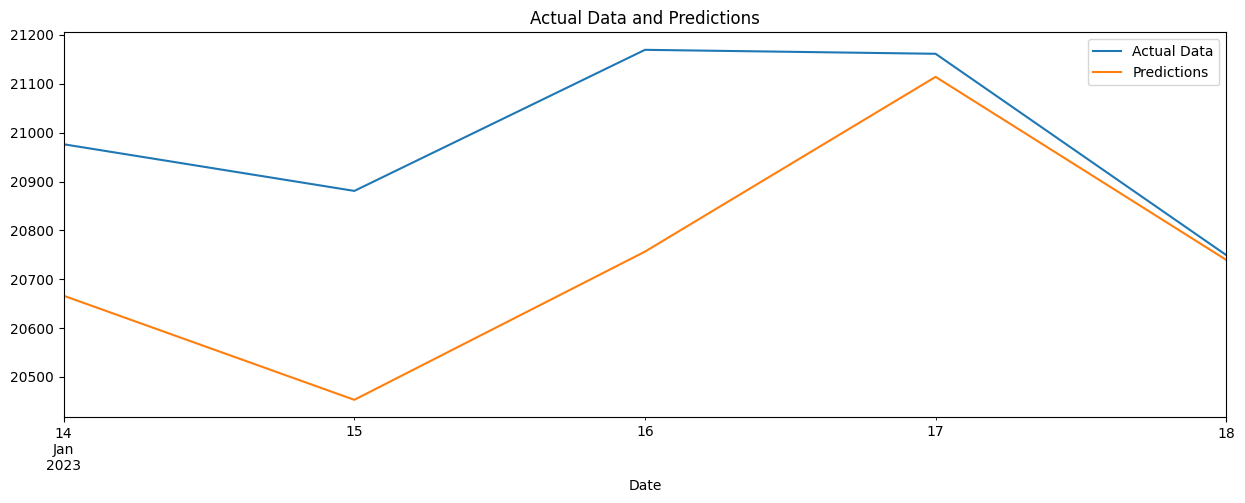

In [126]:
prices_df = pd.DataFrame(prices)
prices_df['Prediction'] = latest_prices

ax = prices_df[['Close']].plot(figsize=(15,5))
prices_df['Prediction'].plot(ax=ax)
plt.legend(['Actual Data', 'Predictions'])
ax.set_title('Actual Data and Predictions')
plt.show()